In [1]:
from aperture_class import AperturePhotometry
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib widget
import pickle
from astropy.io import fits

In [2]:
x_target = 267
y_target = 63
x_reference_01 = 381
y_reference_01 = 117
x_reference_02 = 74
y_reference_02 = 105
aperture = 12
inner_radius = 12
outer_radius = 22

# Target star
target_ap08 = AperturePhotometry()
target_ap08.provide_aperture_parameters(inner_radius, outer_radius, aperture, x_target, y_target)
target_ap08.aperture_photometry()  # Ensure this method is called to calculate attributes like bjd_tdb

# Reference star 1
reference01_ap08 = AperturePhotometry()
reference01_ap08.provide_aperture_parameters(inner_radius, outer_radius, aperture, x_reference_01, y_reference_01)
reference01_ap08.aperture_photometry()  # Ensure this method is called

# Reference star 2
reference02_ap08 = AperturePhotometry()
reference02_ap08.provide_aperture_parameters(inner_radius, outer_radius, aperture, x_reference_02, y_reference_02)
reference02_ap08.aperture_photometry()  # Ensure this method is called

/home/enricogrippi/lab2/TASTE_analysis/aperture_class.py:122: RuntimeWarning: divide by zero encountered in divide
  (science_debiased_errors / science_debiased)**2 +
/home/enricogrippi/lab2/TASTE_analysis/aperture_class.py:121: RuntimeWarning: invalid value encountered in multiply
  science_corrected_errors = science_corrected * np.sqrt(
/home/enricogrippi/lab2/TASTE_analysis/aperture_class.py:122: RuntimeWarning: divide by zero encountered in divide
  (science_debiased_errors / science_debiased)**2 +
/home/enricogrippi/lab2/TASTE_analysis/aperture_class.py:121: RuntimeWarning: invalid value encountered in multiply
  science_corrected_errors = science_corrected * np.sqrt(


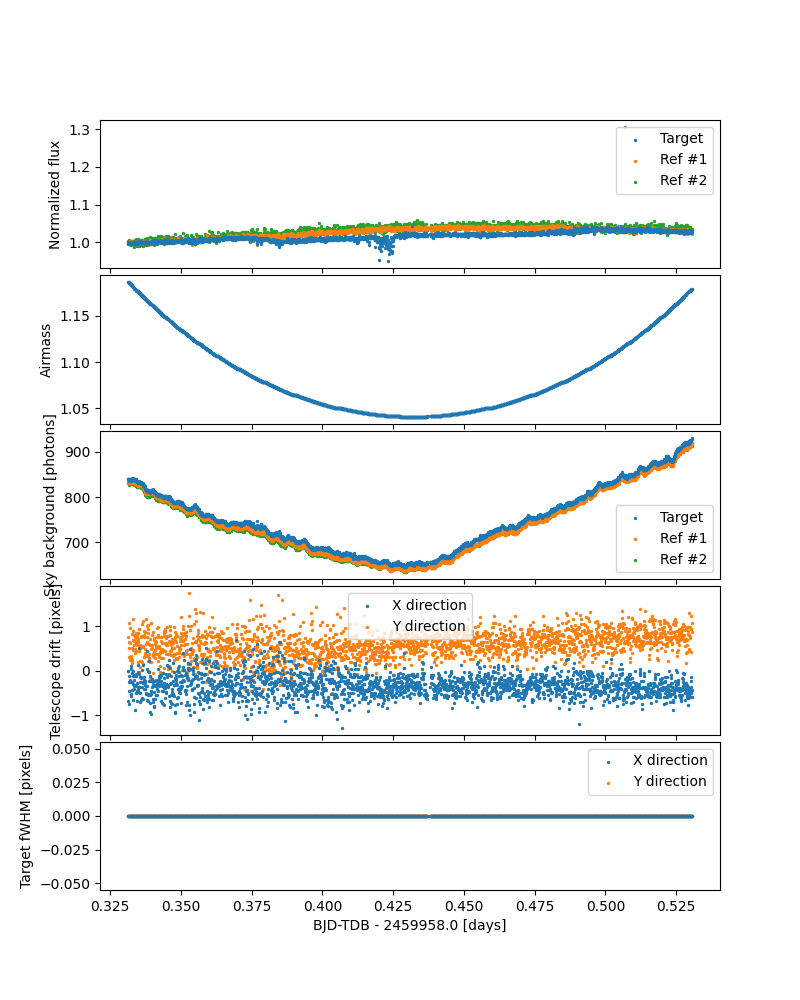

In [3]:
normalization_index = 200
time_offset = 2459958.0

fig, axs = plt.subplots(5, 1, sharex=True, figsize=(8,10))
# Reduce vertical space between axes
fig.subplots_adjust(hspace=0.05)

axs[0].scatter(target_ap08.bjd_tdb-time_offset, target_ap08.aperture/target_ap08.aperture[normalization_index], s=2, zorder=3, c='C0', label='Target')
axs[0].scatter(target_ap08.bjd_tdb-time_offset, reference01_ap08.aperture/reference01_ap08.aperture[normalization_index], s=2, zorder=2, c='C1', label='Ref #1')
axs[0].scatter(target_ap08.bjd_tdb-time_offset, reference02_ap08.aperture/reference02_ap08.aperture[normalization_index], s=2, zorder=1, c='C2', label='Ref #2')
#axs[0].set_yticks(np.arange(0.90, 1.1, 0.025))
#axs[0].set_ylim(0.88, 1.052)
axs[0].set_ylabel('Normalized flux')
axs[0].legend()

axs[1].scatter(target_ap08.bjd_tdb-time_offset, target_ap08.airmass, s=2, c='C0', label='Airmass')
axs[1].set_ylabel('Airmass')

axs[2].scatter(target_ap08.bjd_tdb-time_offset, target_ap08.sky_background, s=2, zorder=3, c='C0', label='Target')
axs[2].scatter(target_ap08.bjd_tdb-time_offset, reference01_ap08.sky_background, s=2, zorder=2, c='C1', label='Ref #1')
axs[2].scatter(target_ap08.bjd_tdb-time_offset, reference02_ap08.sky_background, s=2, zorder=1, c='C2', label='Ref #2')
axs[2].set_ylabel('Sky background [photons]')
#axs[2].set_yscale('log')
axs[2].legend()

axs[3].scatter(target_ap08.bjd_tdb - time_offset, target_ap08.x_position - target_ap08.x_position[0], s=2, zorder=3, c='C0', label='X direction')
axs[3].scatter(target_ap08.bjd_tdb - time_offset, target_ap08.y_position - target_ap08.y_position[0], s=2, zorder=2, c='C1', label='Y direction')
axs[3].set_ylabel('Telescope drift [pixels]')
axs[3].legend()

axs[4].scatter(target_ap08.bjd_tdb-time_offset, target_ap08.x_fwhm, s=2, zorder=3, c='C0', label='X direction')
axs[4].scatter(target_ap08.bjd_tdb-time_offset, target_ap08.y_fwhm, s=2, zorder=2, c='C1', label='Y direction')
axs[4].set_ylabel('Target fWHM [pixels]')
axs[4].legend()


axs[4].set_xlabel('BJD-TDB - {0:.1f} [days]'.format(time_offset))
plt.show()


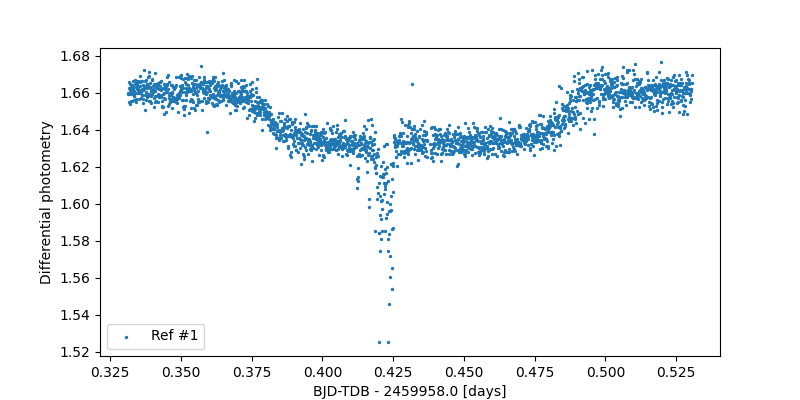

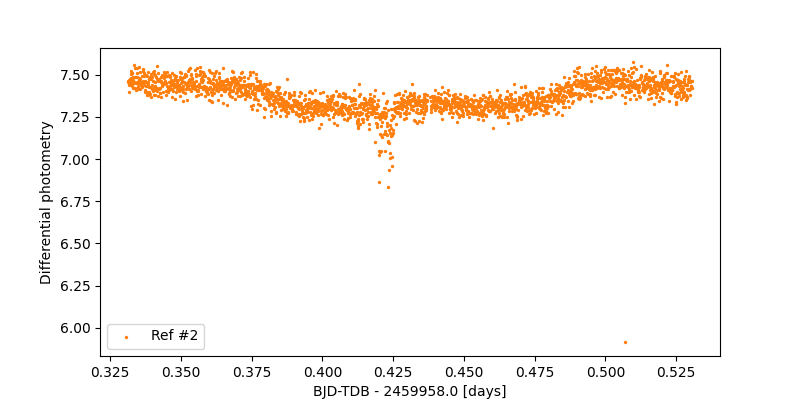

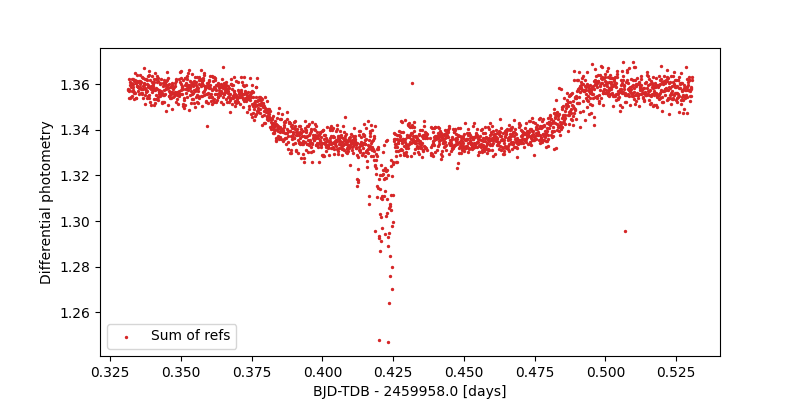

In [4]:
plt.figure(figsize=(8,4))
plt.scatter(target_ap08.bjd_tdb-time_offset, target_ap08.aperture/reference01_ap08.aperture, s=2, c='C0', label='Ref #1')
plt.xlabel('BJD-TDB - {0:.1f} [days]'.format(time_offset))
plt.ylabel('Differential photometry')
plt.legend()
plt.show()

plt.figure(figsize=(8,4))
plt.scatter(target_ap08.bjd_tdb-time_offset, target_ap08.aperture/reference02_ap08.aperture, s=2, c='C1', label='Ref #2')
plt.xlabel('BJD-TDB - {0:.1f} [days]'.format(time_offset))
plt.ylabel('Differential photometry')
plt.legend()
plt.show()

plt.figure(figsize=(8,4))
plt.scatter(target_ap08.bjd_tdb-time_offset, target_ap08.aperture/(reference01_ap08.aperture+reference02_ap08.aperture), s=2, c='C3', label='Sum of refs')
plt.xlabel('BJD-TDB - {0:.1f} [days]'.format(time_offset))
plt.ylabel('Differential photometry')
plt.legend()
plt.show()

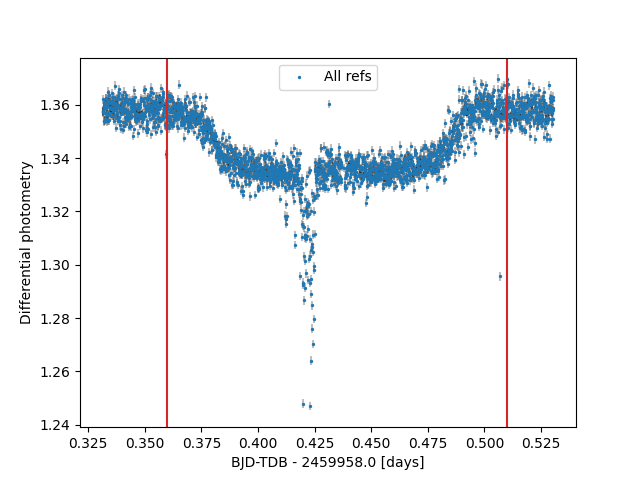

In [5]:
differential_ap08_ref01 = target_ap08.aperture/reference01_ap08.aperture
differential_ap08_ref02 = target_ap08.aperture/reference02_ap08.aperture
differential_ap08_allref = target_ap08.aperture/(reference01_ap08.aperture + reference02_ap08.aperture)

differential_ap08_ref01_error = np.sqrt((target_ap08.aperture_errors/target_ap08.aperture)**2 + (reference01_ap08.aperture_errors/reference01_ap08.aperture)**2)
differential_ap08_ref02_error = np.sqrt((target_ap08.aperture_errors/target_ap08.aperture)**2 + (reference02_ap08.aperture_errors/reference02_ap08.aperture)**2)
differential_ap08_allref_error = np.sqrt((target_ap08.aperture_errors/target_ap08.aperture)**2 + \
                                         (reference01_ap08.aperture_errors**2 + reference02_ap08.aperture_errors**2)/(reference01_ap08.aperture + reference02_ap08.aperture)**2)

plt.figure()
plt.scatter(target_ap08.bjd_tdb-time_offset, differential_ap08_allref, s=2, label='All refs')
plt.errorbar(target_ap08.bjd_tdb-time_offset, differential_ap08_allref, yerr=differential_ap08_allref_error, 
             fmt=' ', c='k', alpha=0.25, zorder=-1) 
plt.legend()
plt.axvline(2459958.360-time_offset, c='C3')
plt.axvline(2459958.510-time_offset, c='C3')
plt.xlabel('BJD-TDB - {0:.1f} [days]'.format(time_offset))
plt.ylabel('Differential photometry')
plt.show()

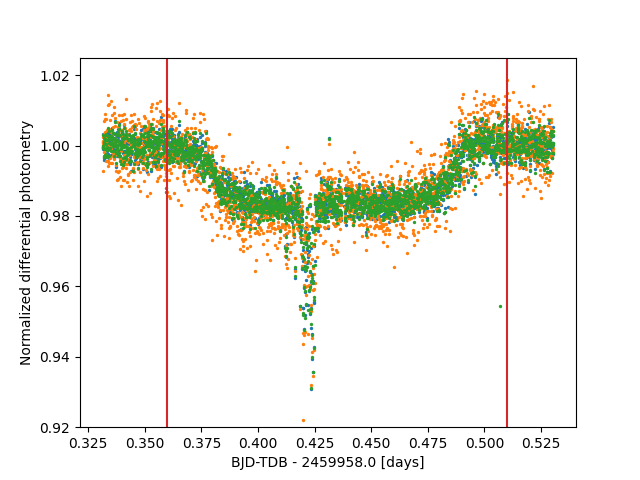

Standard deviation aperture 08 reference #1:    0.0029559
Standard deviation aperture 08 reference #2:    0.0057134
Standard deviation aperture 08 all references : 0.0028284


array([ 1.35773796, -0.00283274])

In [8]:
bjd_tdb = target_ap08.bjd_tdb
bjd_median = np.median(target_ap08.bjd_tdb)

# https://numpy.org/doc/stable/reference/routines.polynomials.package.html#module-numpy.polynomial
from numpy.polynomial import Polynomial

out_transit_selection = ((target_ap08.bjd_tdb < 2459958.360)  | ( target_ap08.bjd_tdb> 2459958.510)) & (target_ap08.bjd_tdb< 2459958.540)

poly_ap08_ref01_deg01_pfit = Polynomial.fit(bjd_tdb[out_transit_selection]-bjd_median, differential_ap08_ref01[out_transit_selection], deg=1)
poly_ap08_ref02_deg01_pfit = Polynomial.fit(bjd_tdb[out_transit_selection]-bjd_median, differential_ap08_ref02[out_transit_selection], deg=1)
poly_ap08_allref_deg01_pfit = Polynomial.fit(bjd_tdb[out_transit_selection]-bjd_median, differential_ap08_allref[out_transit_selection], deg=1)

differential_ap08_ref01_normalized = differential_ap08_ref01 / poly_ap08_ref01_deg01_pfit(bjd_tdb-bjd_median)
differential_ap08_ref02_normalized = differential_ap08_ref02 / poly_ap08_ref02_deg01_pfit(bjd_tdb-bjd_median)
differential_ap08_allref_normalized = differential_ap08_allref / poly_ap08_allref_deg01_pfit(bjd_tdb-bjd_median)

differential_ap08_ref01_normalized_error = differential_ap08_ref01_error / poly_ap08_ref01_deg01_pfit(bjd_tdb-bjd_median)
differential_ap08_ref02_normalized_error = differential_ap08_ref02_error / poly_ap08_ref02_deg01_pfit(bjd_tdb-bjd_median)
differential_ap08_allref_normalized_error = differential_ap08_allref_error / poly_ap08_allref_deg01_pfit(bjd_tdb-bjd_median)



plt.figure()
plt.scatter(bjd_tdb-time_offset, differential_ap08_ref01_normalized, s=2)
plt.scatter(bjd_tdb-time_offset, differential_ap08_ref02_normalized, s=2)
plt.scatter(bjd_tdb-time_offset, differential_ap08_allref_normalized, s=2)

plt.axvline(2459958.360-time_offset, c='C3')
plt.axvline(2459958.510-time_offset, c='C3')
plt.ylim(0.92, 1.025)

plt.xlabel('BJD-TDB - {0:.1f} [days]'.format(time_offset))
plt.ylabel('Normalized differential photometry')
plt.show()

print('Standard deviation aperture 08 reference #1:    {0:.7f}'.format(np.std(differential_ap08_ref01_normalized[out_transit_selection])))
print('Standard deviation aperture 08 reference #2:    {0:.7f}'.format(np.std(differential_ap08_ref02_normalized[out_transit_selection])))
print('Standard deviation aperture 08 all references : {0:.7f}'.format(np.std(differential_ap08_allref_normalized[out_transit_selection])))

c = poly_ap08_allref_deg01_pfit
c.convert().coef

We see that the best differential photometry is th one using all reference stars because the noise (std) is the lowest.

In [7]:
pickle.dump(bjd_tdb, open('taste_bjdtdb.p','wb'))
pickle.dump(differential_ap08_allref, open('differential_allref.p','wb'))
pickle.dump(differential_ap08_allref_error, open('differential_allref_error.p','wb'))
pickle.dump(differential_ap08_allref_normalized, open('differential_allref_normalized.p','wb'))
pickle.dump(differential_ap08_allref_normalized_error, open('differential_allref_normalized_error.p','wb'))

#pickle.dump(differential_ap08_ref01, open('differential_ref01.p','wb'))
#pickle.dump(differential_ap08_ref01_error, open('differential_ref01_error.p','wb'))
#pickle.dump(differential_ap08_ref01_normalized, open('differential_ref01_normalized.p','wb'))
#pickle.dump(differential_ap08_ref01_normalized_error, open('differential_ref01_normalized_error.p','wb'))